In [7]:
DATA_PATH_PICKLES = 'data/Top50/reviews/Pickles'


In [40]:
import io 
from os import listdir
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import *
import re 
import string
from langdetect import detect
import langdetect
import pandas
from collections import defaultdict
import pickle
import ast
import os
import math
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import matplotlib
from nameparser import HumanName
import numpy as np
import string
import seaborn as sns
from statistics import mean
from PIL import Image



In [41]:

def writeFile(f, fname):
#The function writes a pickle file storing the element given in input.
    with open('data/Top50/reviews/Pickles/' + fname, 'wb') as handle:
        pickle.dump(f, handle, protocol = pickle.HIGHEST_PROTOCOL)

def readFile(fname, path = DATA_PATH_PICKLES):
#The function read a pickle file and return the related structure.
    res = None
    with open(path + '/' + fname, 'rb') as handle:
        res = pickle.load(handle)
    return res

In [81]:
DATA_PATH_ENGLISH = 'data/Top50/reviews/English_Only'
def GetCityWordcloudsNormal(path = DATA_PATH_ENGLISH, invertedIndex = 'InvertedIndex.pickle', with_names = False):
#create a dictionary of words(keys) and TF-IDF(value) of each city and then do a wordcloud according to that



    invertedIndex = readFile(invertedIndex)
    

    citynames = [f[:-19] for f in os.listdir(path)]

    for city in citynames:
        cityDictionary = {}
        for word,pair in invertedIndex.items():
            if city in pair[1].keys():  # and word not in self.names:
                cityDictionary[word] = pair[0] * pair[1][city]
        #print(sorted(cityDictionary.items(), key=lambda kv: kv[1],reverse=True)[:100])

        coloring = np.array(Image.open(('data/Images/sofa.png')))

        wc = WordCloud(background_color="white", max_words=500, mask=coloring,max_font_size=40, random_state=42)

        # generate word cloud
        wc.generate_from_frequencies(cityDictionary)

        # create coloring from image
        image_colors = ImageColorGenerator(coloring)
        plt.figure( figsize=(20,20))
        plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
        plt.axis('off')
        plt.show()


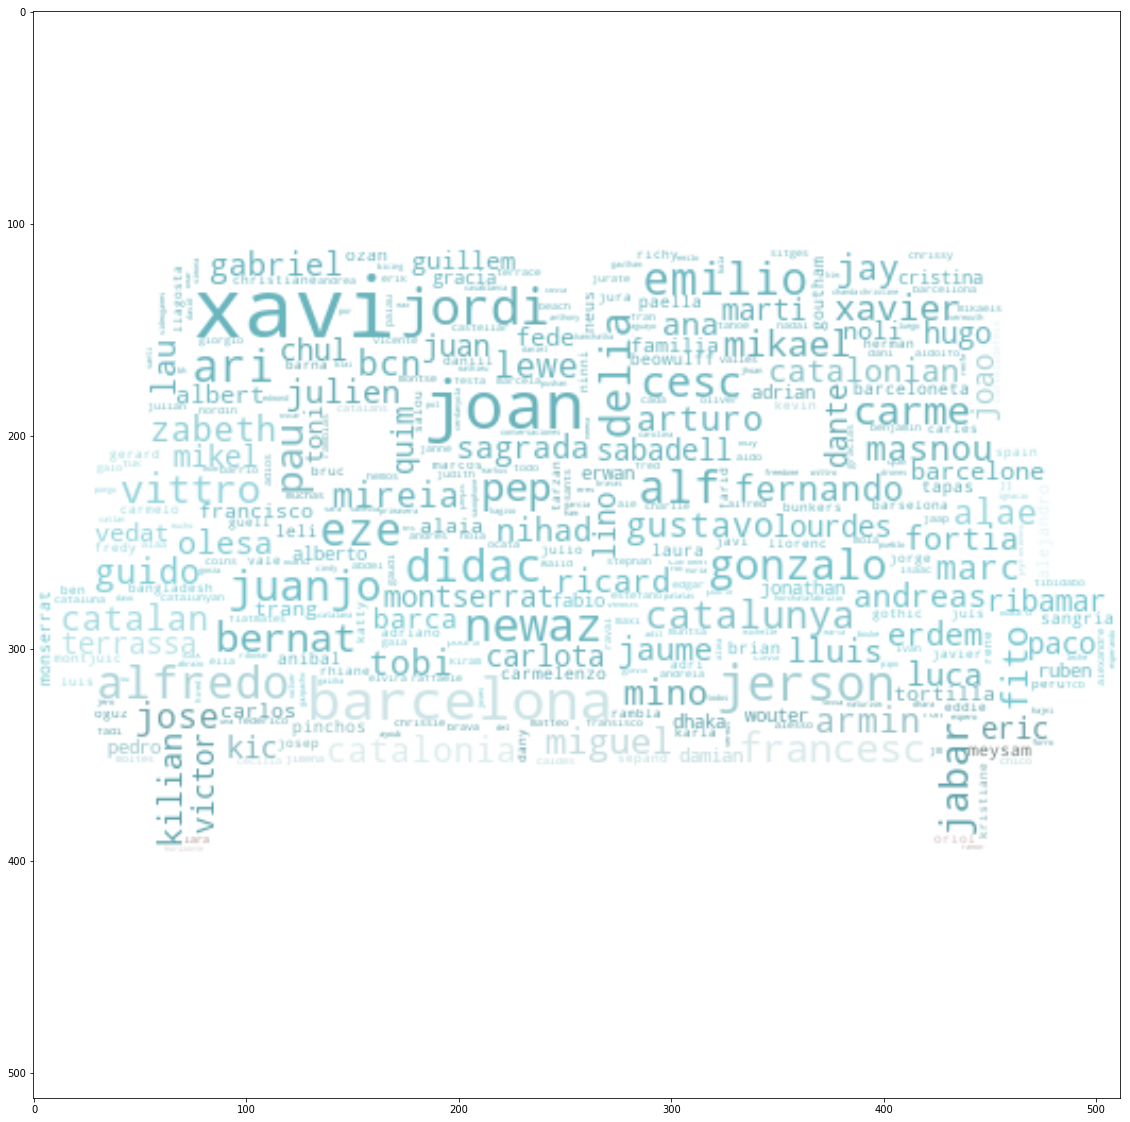

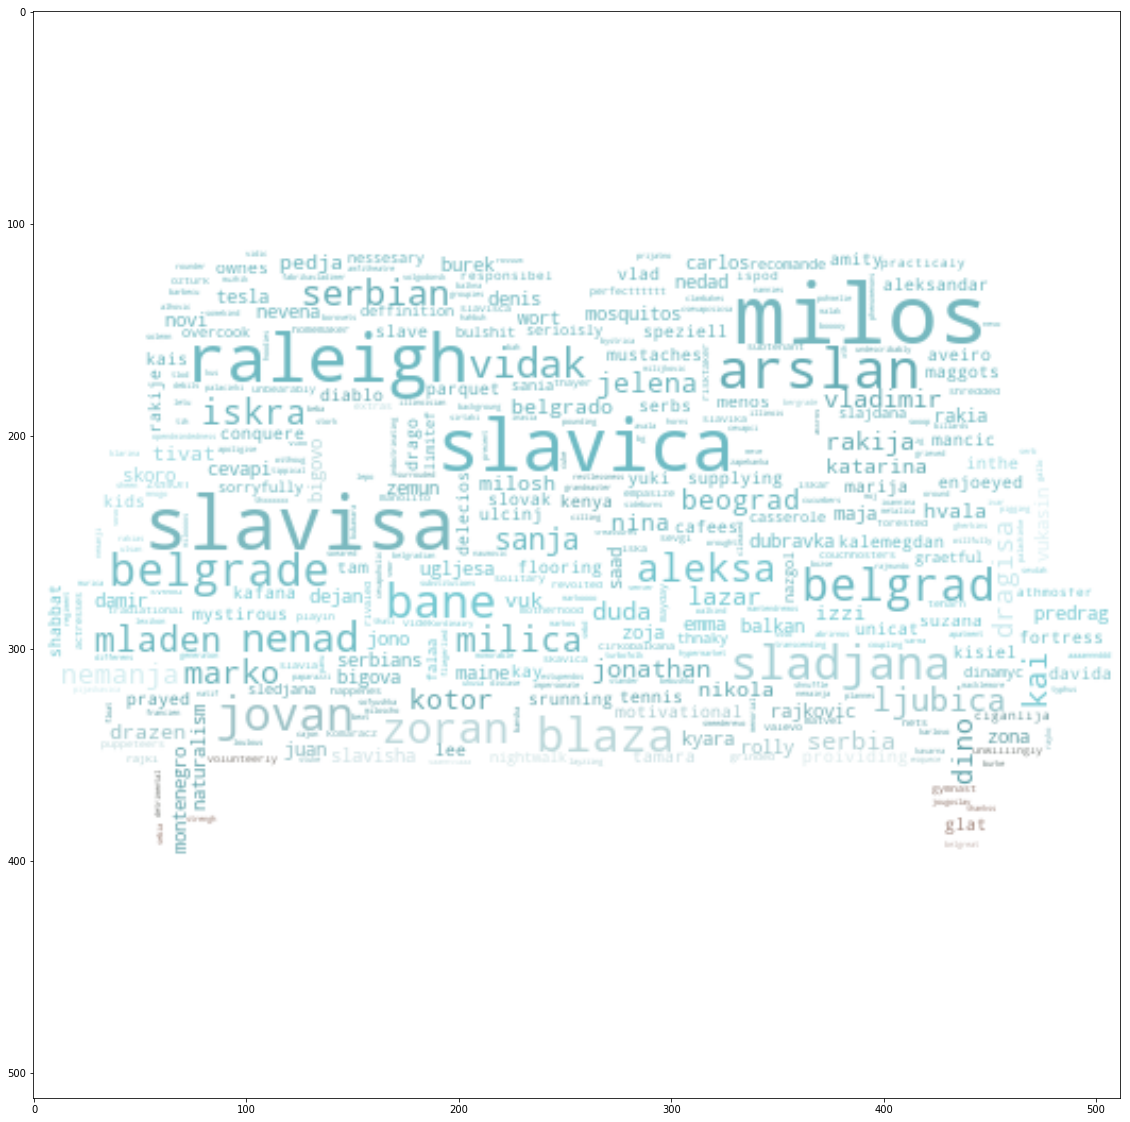

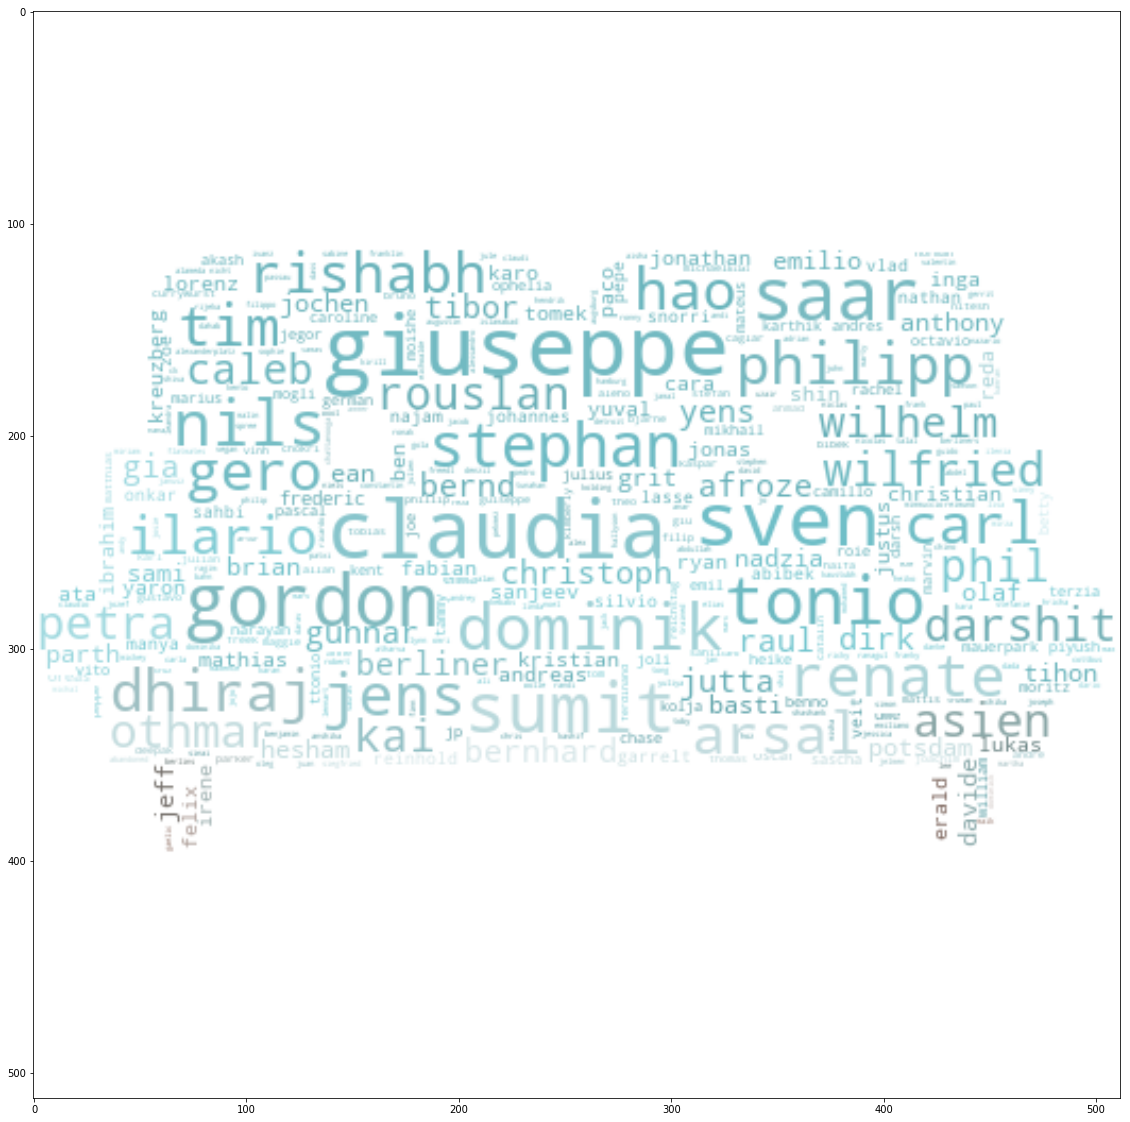

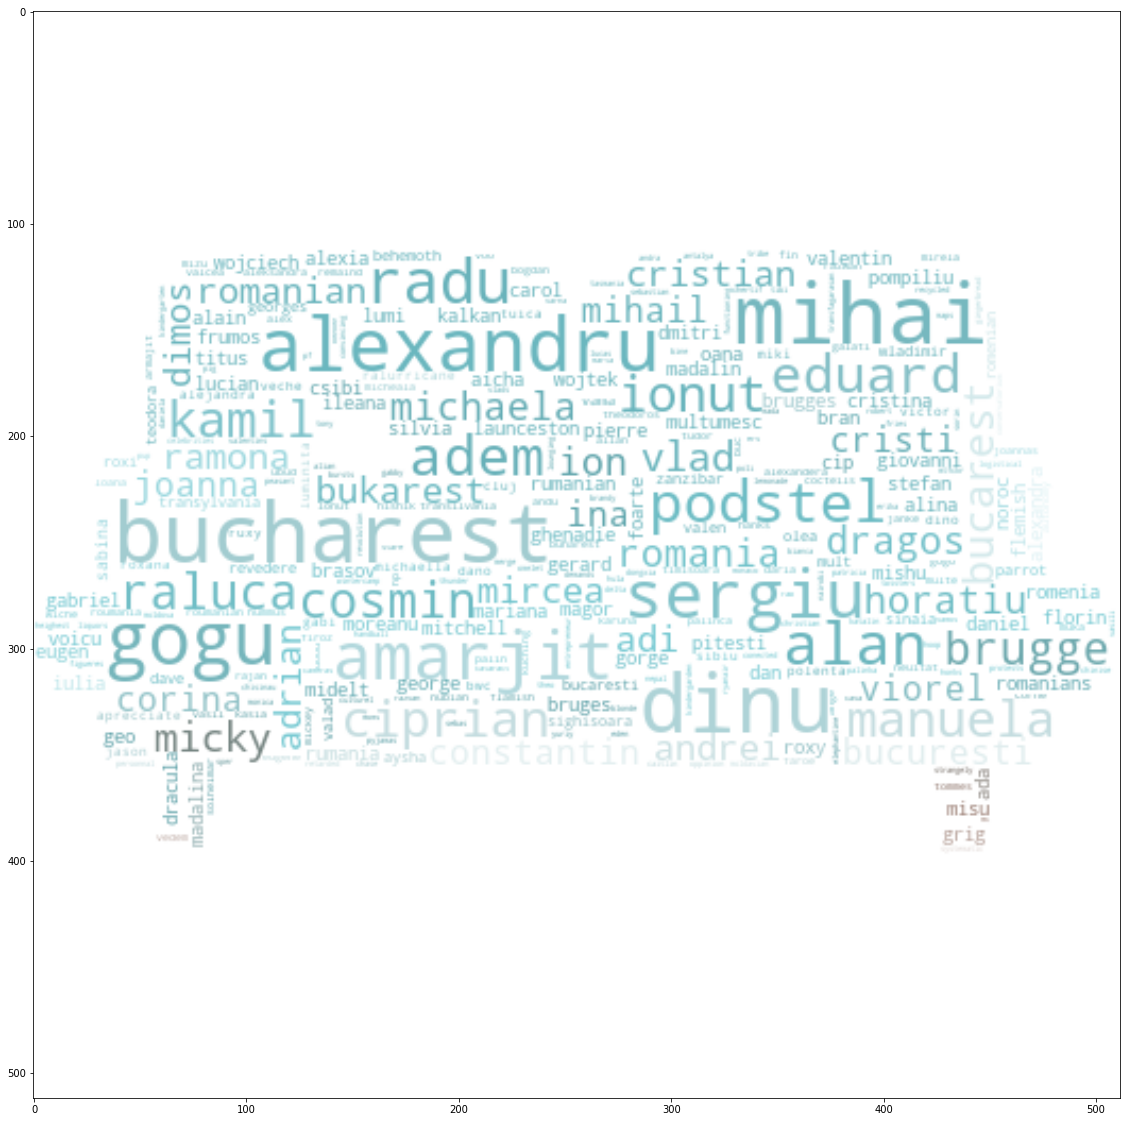

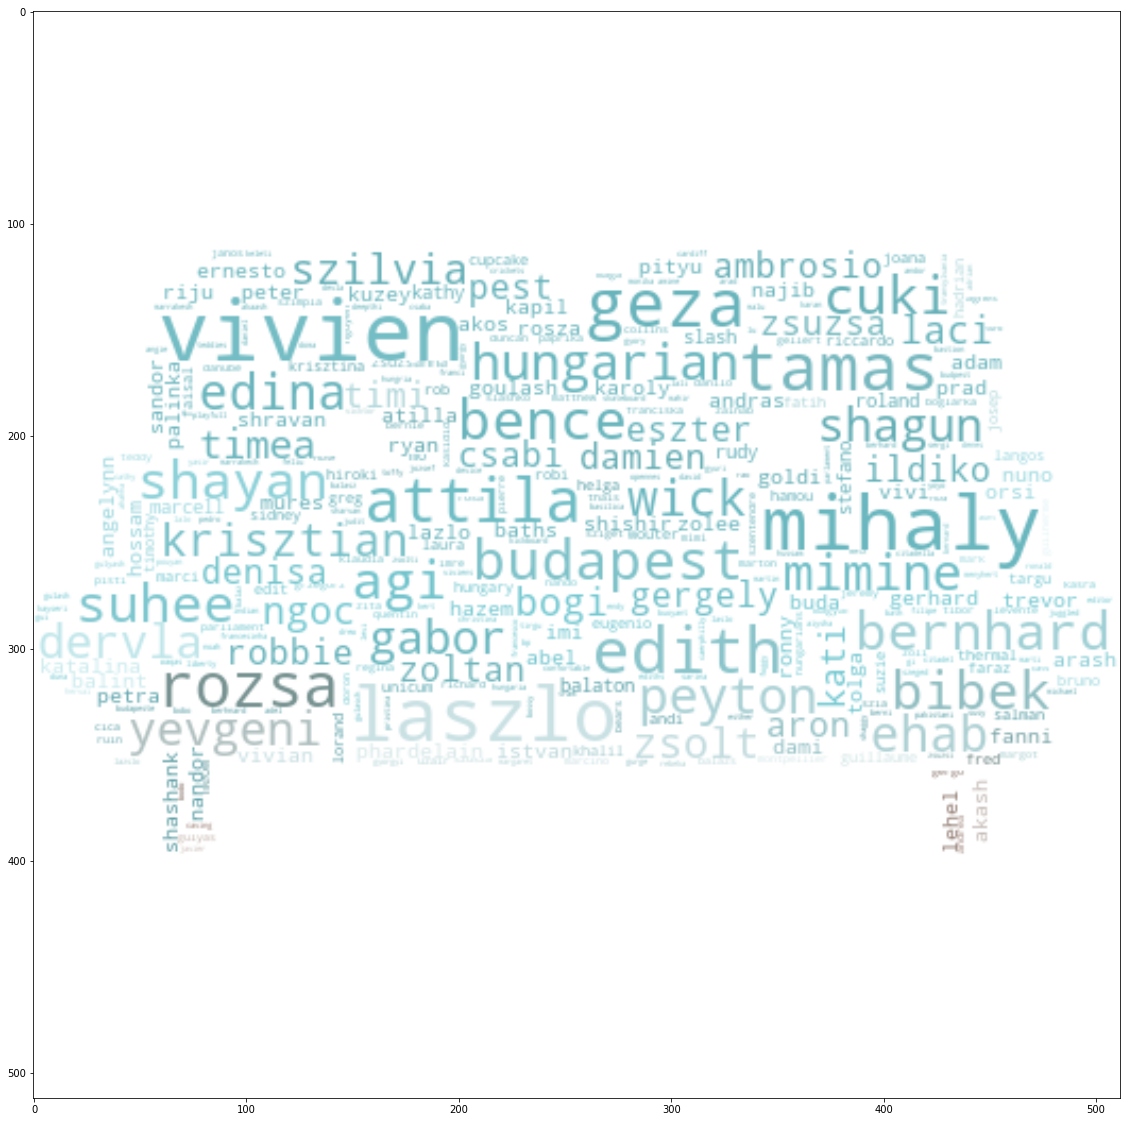

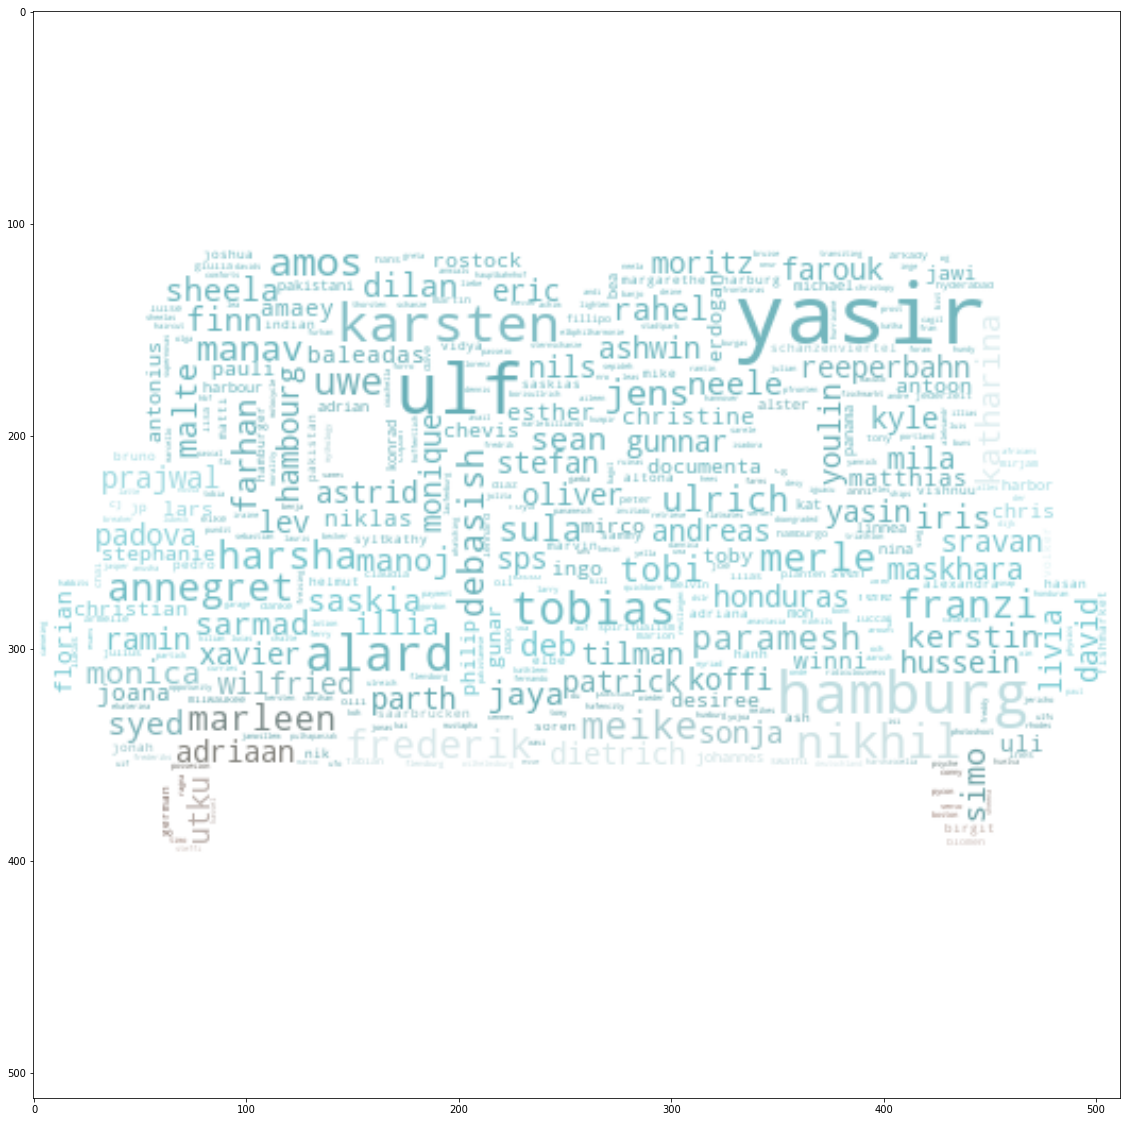

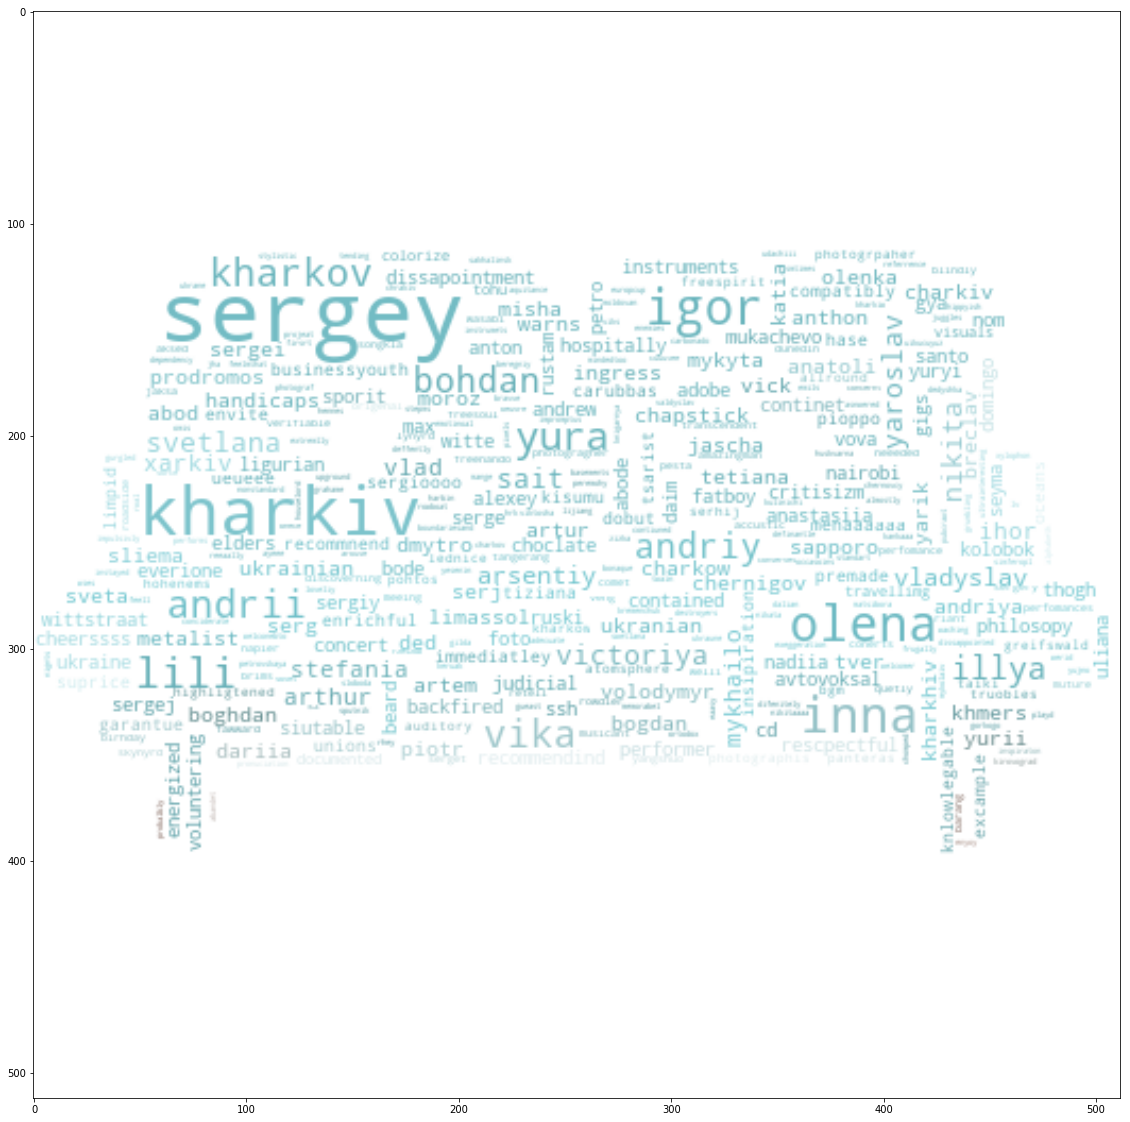

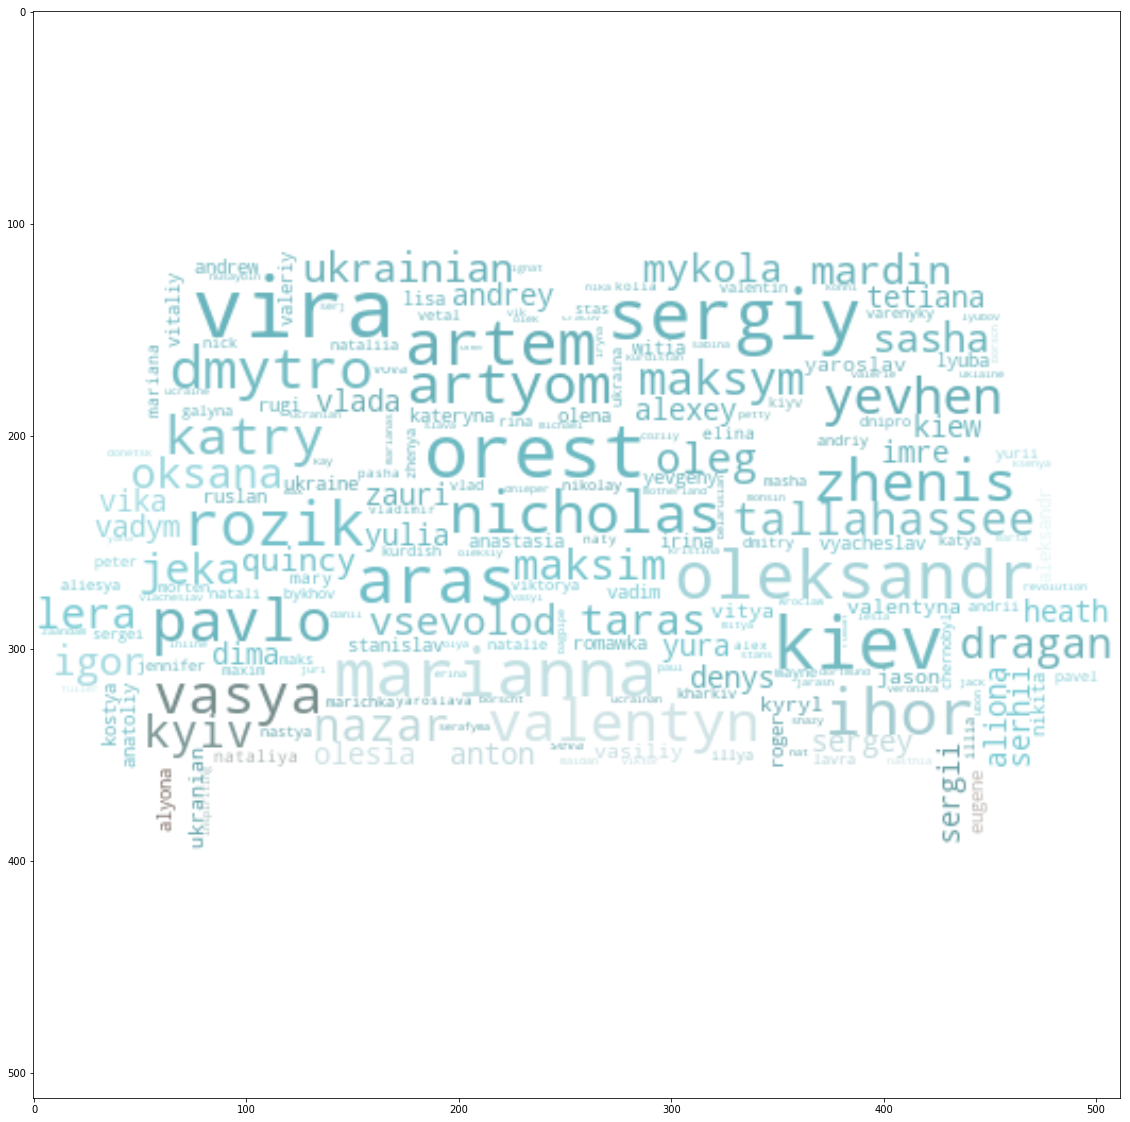

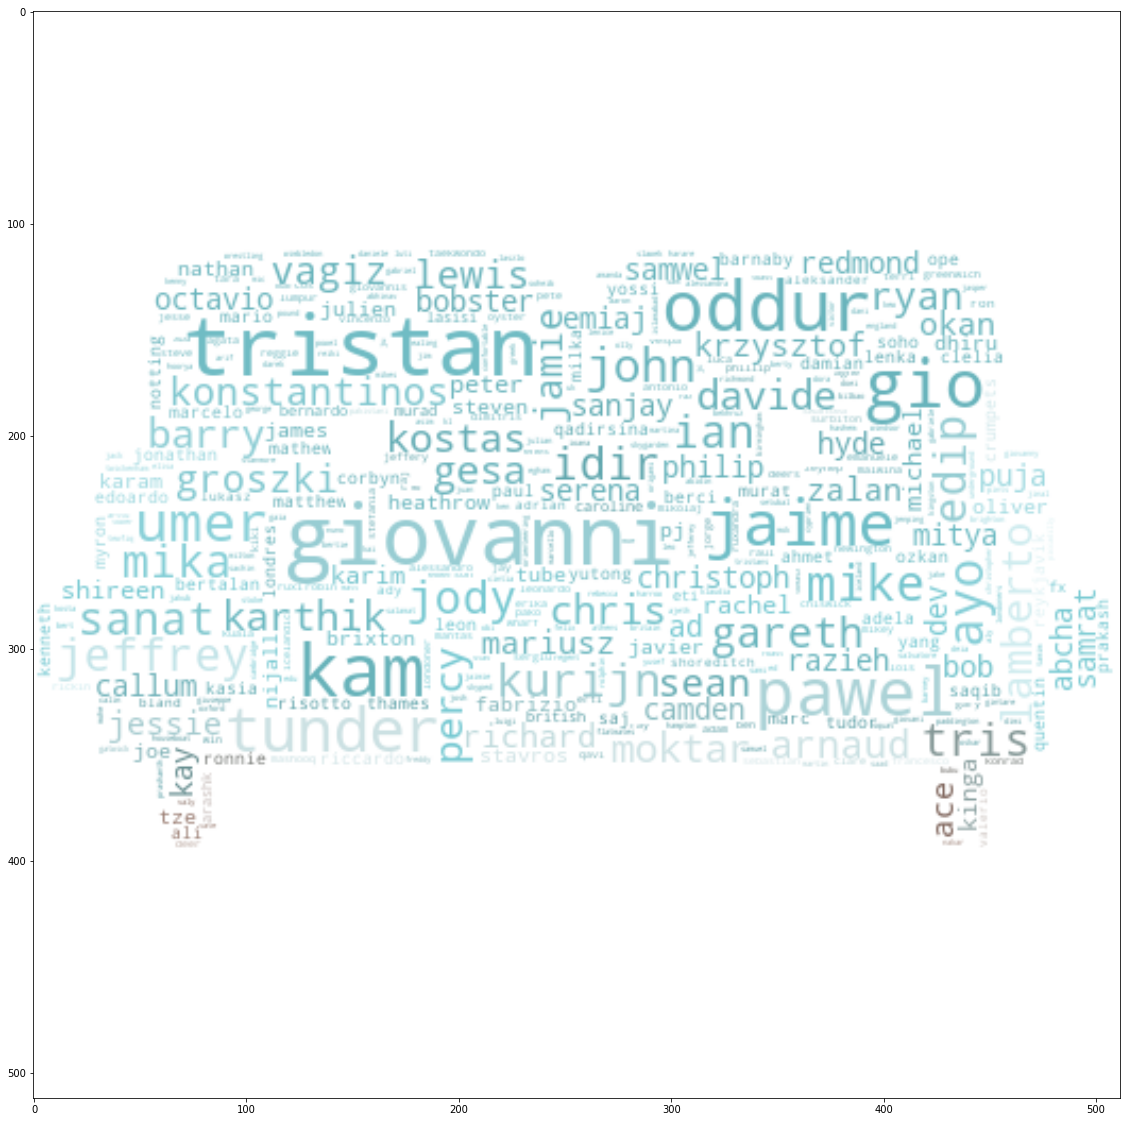

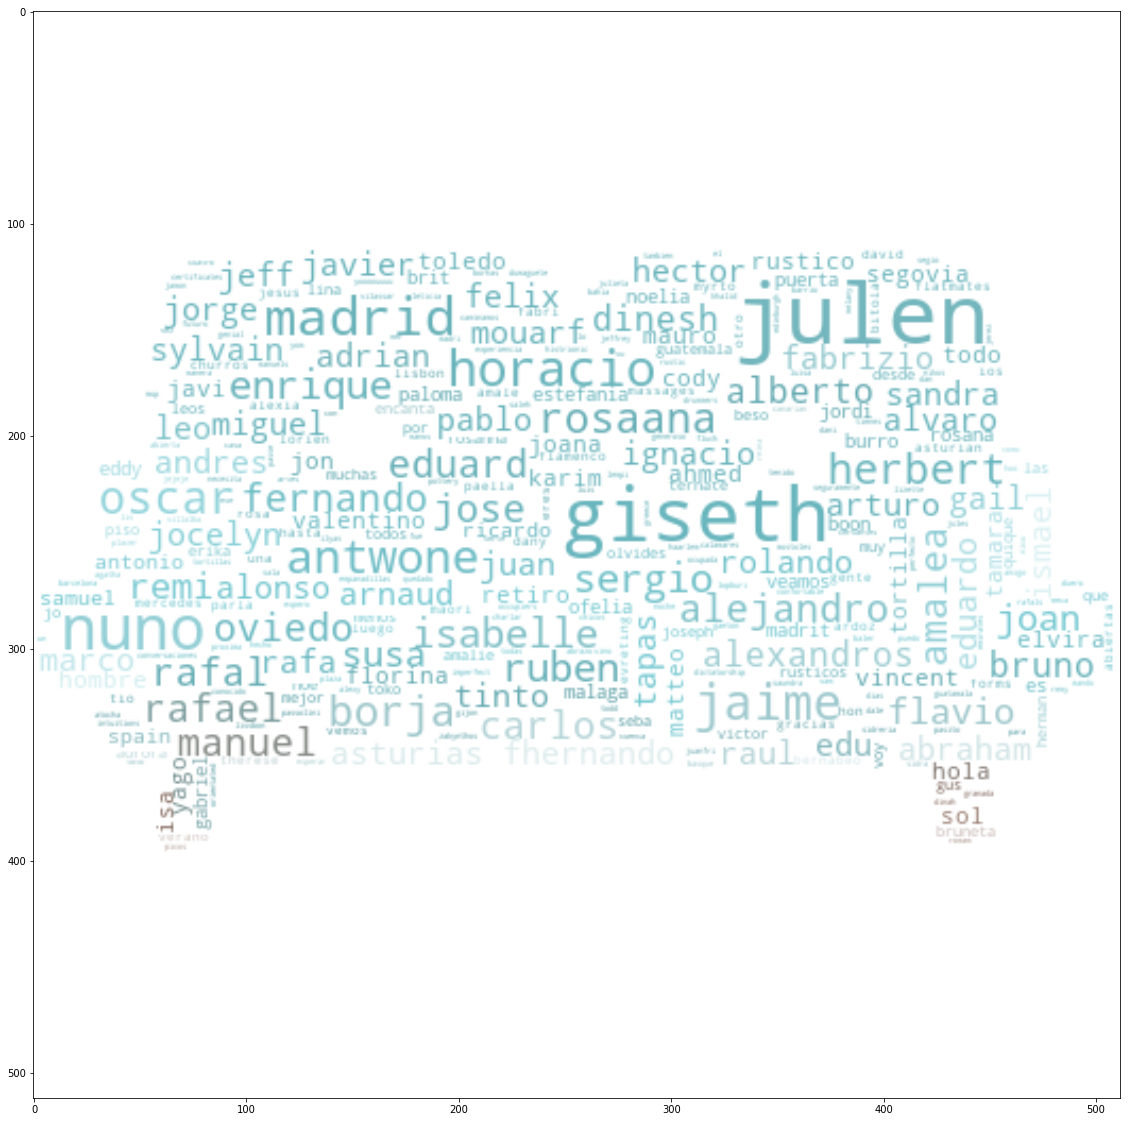

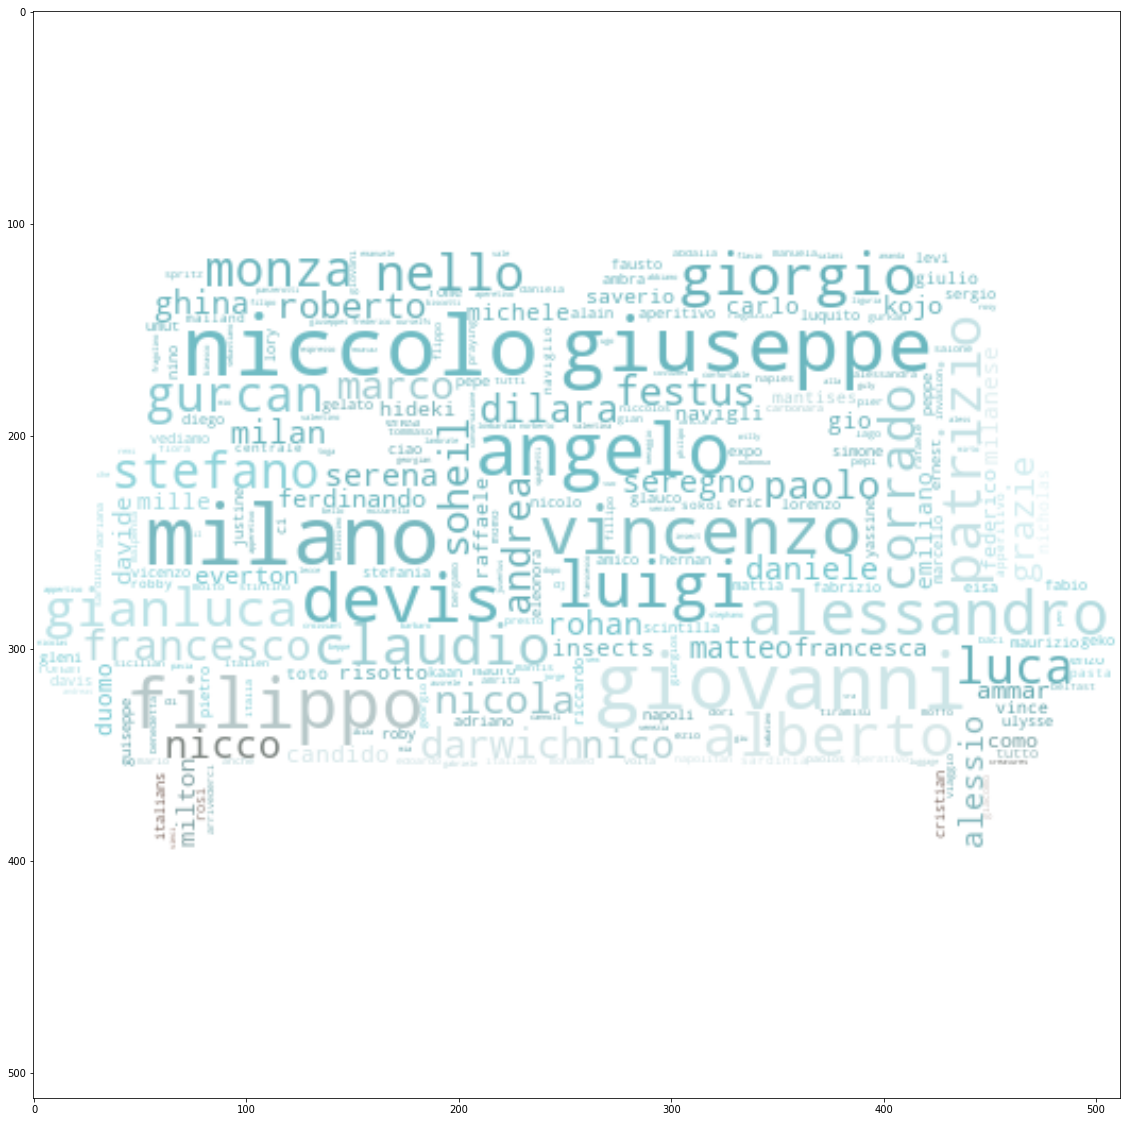

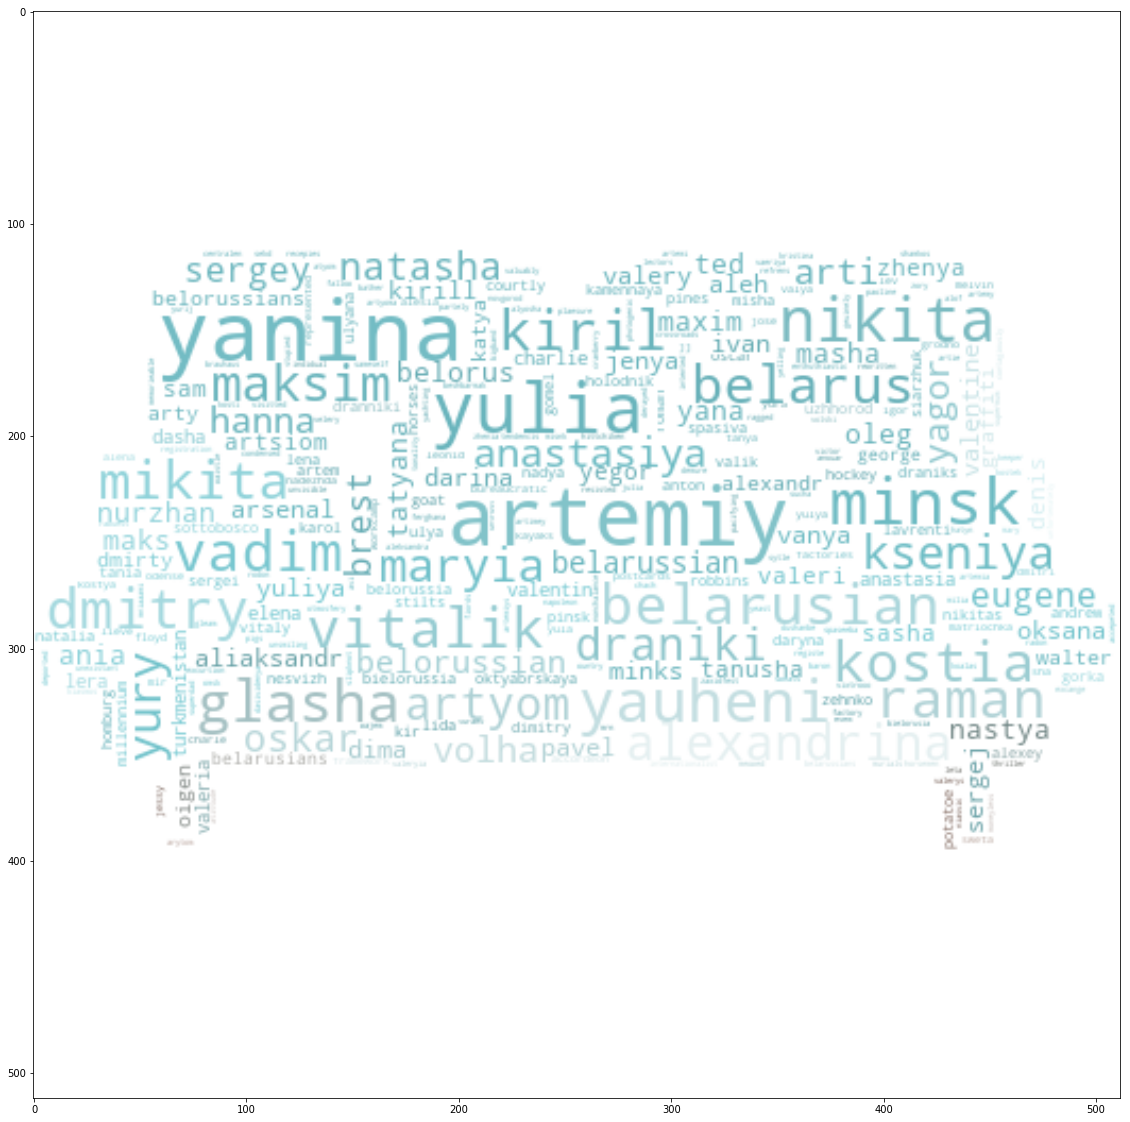

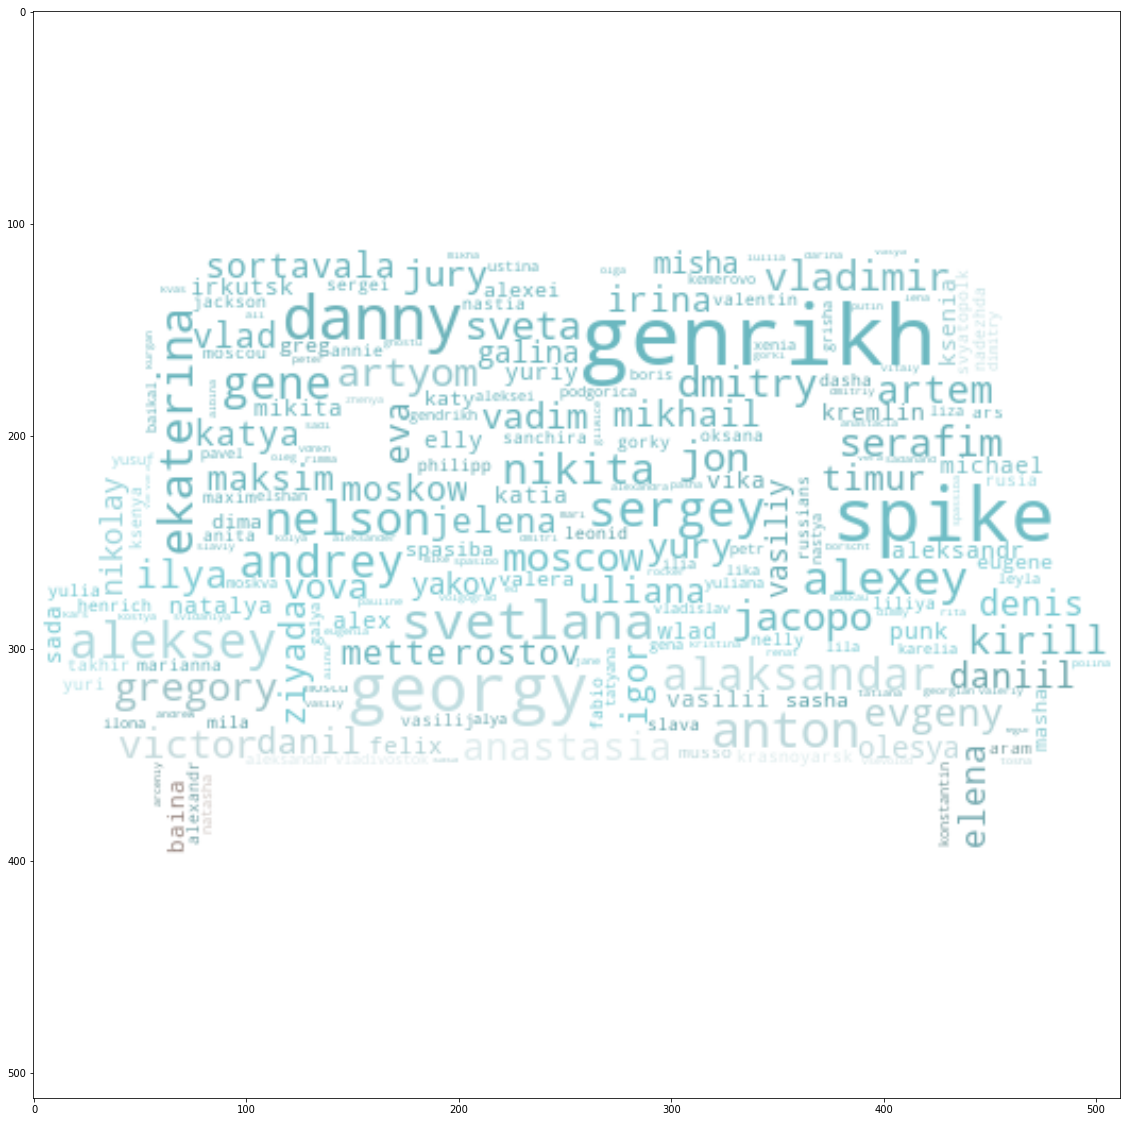

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [82]:
GetCityWordcloudsNormal()